In [2]:
import numpy as np
from skimage.filters import gaussian, threshold_otsu
from skimage.color import rgb2gray
import skimage.filters
from scipy import ndimage
from tqdm import tqdm
import scipy.spatial as ss
from tqdm import tqdm
import tifffile as tif
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
def mask_image(volume, return_mask = False ,sig = 2):
    """
    Create a binary mask from a 2 or 3-dimensional np.array.
    Method normalizes the image, converts it to greyscale, then applies gaussian bluring (kernel width set to 2 by default, can be changed with sig parameter).
    This is followed by thresholding the image using the isodata method and returning a binary mask. 
    Parameters
    ----------
    image           np.array
                    np.array of an image (2 or 3D)
    return_mask     bool
                    If False (default), the mask is subtracted from the original image. If True, a boolian array is returned, of the shape of the original image, as a mask. 
    sig             Int
                    kernel width for gaussian smoothing. set to 2 by default.
    Returns
    -------
    mask            np.array
                    Returns a binary np.array of equal shape to the original image, labeling the masked area.
    
    """

    image = volume.copy()
    # if input image is 2D...

    image = image.astype('float32')
    # normalize to the range 0-1
    image -= image.min()
    image /= image.max()

    # blur and grayscale before thresholding
    blur = gaussian(image, sigma=sig)

    # perform adaptive thresholding
    t = threshold_otsu(blur.ravel())
    mask = blur > t

    # convert to bool
    mask = np.array(mask, dtype=bool)

    if return_mask == False:
        image[mask==False] = 0
        return image
    else:
        return mask


In [128]:
file = 'C:/Users/tli_project/Desktop/cell/retreat/start_end/clahe_GFP_211121_brain4.1_LP80_P36_last.tif'
image = tif.imread(file)
# image = image[np.newaxis,:,:,:]
# image = np.swapaxes(image,1,3)
# image = np.swapaxes(image,0,2)
image.shape

(86, 1024, 1024)

In [129]:
# img_gfp = image[:,:,1,:,:]

In [130]:
# plt.imshow(image[20])

In [131]:
masks = np.zeros(image.shape)
masks.shape

(86, 1024, 1024)

In [136]:
for i, img in enumerate(image):
    try:
        masks[i] = mask_image(img, return_mask = True ,sig = 2)
    except:
        masks[i] = masks[i]

In [137]:
masks.dtype, masks.min(), masks.max()

(dtype('uint16'), 0, 1)

In [138]:
masks = masks * 4000
masks = masks.astype(np.uint16)

In [139]:
save_file = 'C:/Users/tli_project/Desktop/cell/retreat/start_end/clahe_GFP_211121_brain4.1_LP80_P36_last_mask1.tif'
tif.imwrite(save_file, masks)

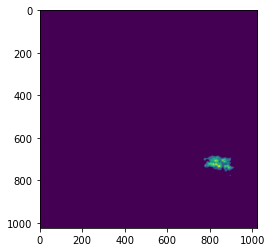

In [32]:
plt.imshow(masks[20,20])

In [33]:
masks = masks * 4000

In [34]:
masks = masks.astype(np.uint16)

In [35]:
masks.max()

4000

In [21]:
tif.imwrite('211011_neuron1_masks.tif', masks)

In [36]:
for i, img in enumerate(masks):
    tif.imwrite('211011_neuron1_masks2_'+str(i)+'.tif', img)